Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

## Term Project: TorontoRobbery - Data Analysis 


For this term project, we will analyze the open dataset of toronto robbery provided by Toronto City(http://data.torontopolice.on.ca/datasets/281a5ad35c60458cb7de41c5ae99d5b5_0.) . 

We are going to read the data from the file into pandas DataFrame. Analyze, clean and transform the data to answer the following question:

### Questions:

**TYPE:**

1. What type of robbery is most common? Least common?
2. Does this change from 2014 to 2017?
            -year by year comparison
            -2018 - 2014 comparison
            
**TIME:**

1. At what time is a robbery most likely to occur? Least likely?
            -Time/Hour of the day
            -Morning/Afternoon/Evening ← a new categorical variable
            -Day of week
            -Month of year
            -Season ← a new categorical variable
2. Does this change from 2014 to 2017?
            -year by year comparison
            -2017 - 2014 comparison

**LOCATION:**

1. In what areas do most robberies occur? Least robberies?
            -Neighbourhood
            -Location (commercial vs. outside)
            -Robbery relative to Income
            -Robbery relation to Education level
2. % of neighbourhood residents whose mother tongue is not English or French

3. % of neighbourhood residents who are unemployed

4. % of neighbourhood residents who are movers

**RESPONSE:**
1. Which police divisions respond to the most robberies?
2. How long do people wait to report a robbery (e.g. reported date vs. occuring date)?
3. Which robbery types are reported the most quickly? Least quickly?


**PREDICTION:** 

 - Based on a given time and location, how likely are you to be robbed?
     - Note: must define time (e.g. hour vs. day) and location

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Load CSV file into Panda's DataFrame 

robbery_data = pd.read_csv('Data/robbery_data.csv',index_col = "Record_ID")

neighbourhood_data = pd.read_csv('Data/neighbourhood.csv',index_col = "Neighbourhood_ID")

offence_data = pd.read_csv('Data/offences.csv', index_col = "Offence_ID")

premises_data =  pd.read_csv('Data/premise_types.csv',index_col = "Premise_Type_ID")

daytime_data = pd.read_csv('Data/time_of_day.csv',index_col = "Time_Of_Day_ID")


In [3]:
##Merge the robbery dataset and neighbourhood dataset into one file (mergedfile)


In [4]:
robbery_data['Occurence_Date'] = pd.to_datetime(robbery_data['Occurence_Date'])
robbery_data.dtypes

Occurrence_DateTime                          object
Reported_DateTime                            object
Reported_After_Occurrence_WEEKS               int64
Reported_After_Occurrence_DAYS                int64
Reported_After_Occurrence_HOURS               int64
Reported_After_Occurrence_MINUTES             int64
Occurence_Date                       datetime64[ns]
Occurred_Time_Of_Day_ID                       int64
Reported_Date                                object
Reported_Time_Of_Day_ID                       int64
Neighbourhood_ID                              int64
Offence_ID                                    int64
Premise_Type_ID                               int64
Occurrence_Postal_Code                       object
Occurrence_FSA                               object
Division                                     object
Division_Num                                  int64
occurrencedate                               object
reporteddate                                 object
occurrenceho

In [5]:
robbery_data['Occurance_Year'] = robbery_data['Occurence_Date'].dt.year
robbery_data_1418 = robbery_data[robbery_data.Occurance_Year > 2013]
year_totals = robbery_data_1418['Occurance_Year'].value_counts().sort_index()
year_totals

2014    3585
2015    3464
2016    3613
2017    3901
2018    3522
Name: Occurance_Year, dtype: int64

In [6]:
mergedfile = pd.merge(robbery_data_1418, neighbourhood_data, how='inner', on=['Neighbourhood_ID'])
mergedfile
#mergedfile.to_csv('Data/mergedfile.csv')

In [7]:
## In what neighbourhoods do most robberies occur? Least robberies? (2014-2018 Total)


In [8]:
mergedfile['Neighbourhood'].value_counts()

Church-Yonge Corridor                  903
Moss Park                              628
Mount Olive-Silverstone-Jamestown      460
Woburn                                 429
West Humber-Clairville                 375
York University Heights                370
Kensington-Chinatown                   367
Bendale                                346
West Hill                              322
Dovercourt-Wallace Emerson-Junction    316
Annex                                  314
Waterfront Communities-The Island      308
Downsview-Roding-CFB                   297
Bay Street Corridor                    286
Eglinton East                          267
Black Creek                            252
Malvern                                249
Willowdale East                        233
L'Amoreaux                             223
Clairlea-Birchmount                    221
Glenfield-Jane Heights                 216
Kennedy Park                           209
Islington-City Centre West             207
Wexford/Mar

In [9]:
mergedfile['Neighbourhood'].value_counts().nlargest(20)

Church-Yonge Corridor                  903
Moss Park                              628
Mount Olive-Silverstone-Jamestown      460
Woburn                                 429
West Humber-Clairville                 375
York University Heights                370
Kensington-Chinatown                   367
Bendale                                346
West Hill                              322
Dovercourt-Wallace Emerson-Junction    316
Annex                                  314
Waterfront Communities-The Island      308
Downsview-Roding-CFB                   297
Bay Street Corridor                    286
Eglinton East                          267
Black Creek                            252
Malvern                                249
Willowdale East                        233
L'Amoreaux                             223
Clairlea-Birchmount                    221
Name: Neighbourhood, dtype: int64

In [10]:
mergedfile['Neighbourhood'].value_counts().nsmallest(20)

Bridle Path-Sunnybrook-York Mills     6
Yonge-St.Clair                        8
Lambton Baby Point                   10
Forest Hill South                    12
Lawrence Park North                  18
Bayview Woods-Steeles                19
Humewood-Cedarvale                   21
Henry Farm                           23
Broadview North                      24
Centennial Scarborough               25
Edenbridge-Humber Valley             26
Etobicoke West Mall                  26
Mount Pleasant East                  26
Markland Wood                        27
Lawrence Park South                  27
Caledonia-Fairbank                   31
Danforth East York                   34
Casa Loma                            34
Alderwood                            36
Princess-Rosethorn                   38
Name: Neighbourhood, dtype: int64

In [11]:
mergedfile['Occurance_Year'] = mergedfile['Occurence_Date'].dt.year
year_totals = mergedfile['Occurance_Year'].value_counts()
year_totals

2017    3901
2016    3613
2014    3585
2018    3522
2015    3464
Name: Occurance_Year, dtype: int64

In [12]:
## In what neighbourhoods do most robberies occur? Least robberies? (22014-2018 every year)
offence_per_year = mergedfile.groupby(by='Occurance_Year')['Neighbourhood'].value_counts()
offence_per_year.nlargest(20)


Occurance_Year  Neighbourhood                    
2018            Church-Yonge Corridor                224
2017            Church-Yonge Corridor                206
2016            Church-Yonge Corridor                172
2018            Moss Park                            159
2015            Church-Yonge Corridor                158
2014            Church-Yonge Corridor                143
2015            Moss Park                            133
2017            Woburn                               126
2014            Moss Park                            125
2016            Moss Park                            118
                Mount Olive-Silverstone-Jamestown    114
2015            Mount Olive-Silverstone-Jamestown    108
2017            Kensington-Chinatown                  95
                Moss Park                             93
                West Humber-Clairville                93
2018            Waterfront Communities-The Island     93
2017            Mount Olive-Silverston

In [13]:
offence_per_year.nsmallest(20)

Occurance_Year  Neighbourhood                    
2014            Bridle Path-Sunnybrook-York Mills    1
                Henry Farm                           1
                Lambton Baby Point                   1
2015            Bayview Woods-Steeles                1
                Forest Hill South                    1
                Lambton Baby Point                   1
2016            Henry Farm                           1
2017            Bridle Path-Sunnybrook-York Mills    1
                Broadview North                      1
2018            Humewood-Cedarvale                   1
                Lambton Baby Point                   1
                Yonge-St.Clair                       1
2014            Mount Pleasant East                  2
                Yonge-St.Clair                       2
2015            Bridle Path-Sunnybrook-York Mills    2
                Markland Wood                        2
2016            Bridle Path-Sunnybrook-York Mills    2
               

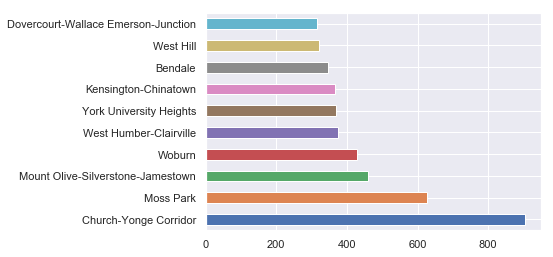

In [14]:
##Data visualization, plotting the 10 neighorhood with the highest nunbers of robberies (2014-2018)

mergedfile['Neighbourhood'].value_counts()[:10].plot(kind='barh')

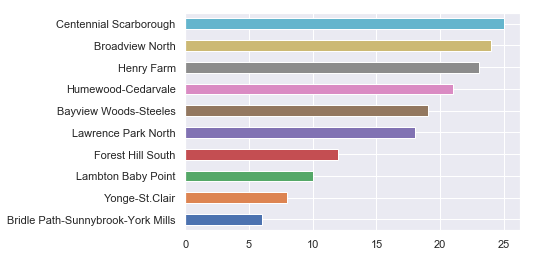

In [15]:
##plotting the 10 neighorhood with the lowest nunbers of robberies (2014-2018)

mergedfile['Neighbourhood'].value_counts(ascending=True)[:10].plot(kind='barh')

In [16]:
##Location of Robbery: 1-House
Premise_House = robbery_data_1418.loc[robbery_data['Premise_Type_ID'] == 1]
Premise_House_Year = Premise_House.groupby(by='Occurance_Year')['Premise_Type_ID'].value_counts()
Premise_House_Year

Occurance_Year  Premise_Type_ID
2014            1                  2175
2015            1                  2032
2016            1                  2085
2017            1                  2128
2018            1                  1875
Name: Premise_Type_ID, dtype: int64

In [17]:
##Location of Robbery: 2-Apartment
Premise_Apt = robbery_data_1418.loc[robbery_data['Premise_Type_ID'] == 2]
Premise_Apt_Year = Premise_Apt.groupby(by='Occurance_Year')['Premise_Type_ID'].value_counts()
Premise_Apt_Year

Occurance_Year  Premise_Type_ID
2014            2                  336
2015            2                  342
2016            2                  293
2017            2                  351
2018            2                  311
Name: Premise_Type_ID, dtype: int64

In [18]:
##Location of Robbery: 3-Outside
Premise_Out = robbery_data_1418.loc[robbery_data['Premise_Type_ID'] == 3]
Premise_Out_Year = Premise_Out.groupby(by='Occurance_Year')['Premise_Type_ID'].value_counts()
Premise_Out_Year

Occurance_Year  Premise_Type_ID
2014            3                  317
2015            3                  227
2016            3                  290
2017            3                  337
2018            3                  296
Name: Premise_Type_ID, dtype: int64

In [19]:
##Location of Robbery: 4-Other
Premise_Other = robbery_data_1418.loc[robbery_data['Premise_Type_ID'] == 4]
Premise_Other_Year = Premise_Other.groupby(by='Occurance_Year')['Premise_Type_ID'].value_counts()
Premise_Other_Year

Occurance_Year  Premise_Type_ID
2014            4                   80
2015            4                  103
2016            4                  125
2017            4                  126
2018            4                   92
Name: Premise_Type_ID, dtype: int64

In [23]:
##Location of Robbery: 5-Commercial
Premise_Com = robbery_data_1418.loc[robbery_data['Premise_Type_ID'] == 5]
Premise_Com_Year = Premise_Com.groupby(by='Occurance_Year')['Premise_Type_ID'].value_counts()
Premise_Com_Year

Occurance_Year  Premise_Type_ID
2014            5                  677
2015            5                  760
2016            5                  820
2017            5                  959
2018            5                  948
Name: Premise_Type_ID, dtype: int64

In [24]:
##Correlation between the number of robberies and demographic variables I engineered for this analysis

neighbourhood_data = pd.read_csv('Data/neighbourhood.csv',index_col = "Neighbourhood_ID")
neighbourhood_data.dtypes


Neighbourhood                                                            object
PopulationCount                                                           int64
PopulationDensity_Per_SqKM                                                int64
PopulationCount_0_14                                                      int64
PopulationCount_15_24                                                     int64
PopulationCount_25_54                                                     int64
PopulationCount_55_64                                                     int64
PopulationCount_65+                                                       int64
Percentage of residents do not speak English or French                  float64
Percentage of residents whose mother tongue is not English or French    float64
Percentage of residents who do not speak offical languages at home      float64
Percentage of residents with totoal income of $150K and over            float64
Percentage of Household Income of Over $

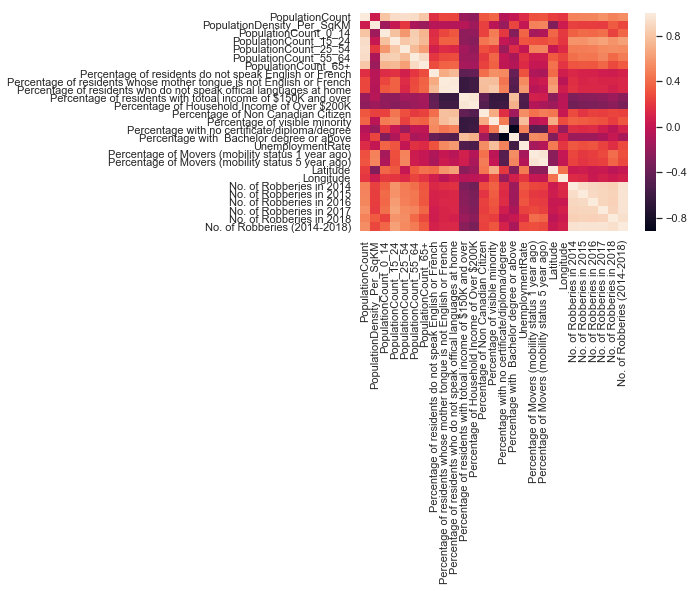

In [26]:
##create a correlation matrix heat map to visualize where strong to moderate correlations exisit. 
import seaborn as sns
corr = neighbourhood_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

##from this heatmap, the moderate correlations exist between population variables, No. of Robberies (2014-2018) and income levels and education level 

In [27]:
neighbourhood_data['No. of Robberies (2014-2018)'].corr(neighbourhood_data['Percentage of Household Income of Over $200K'])

-0.31460488345590126

In [28]:
neighbourhood_data['No. of Robberies (2014-2018)'].corr(neighbourhood_data['Percentage of residents with totoal income of $150K and over'])

-0.24990836473778413

In [29]:
neighbourhood_data['No. of Robberies (2014-2018)'].corr(neighbourhood_data['PopulationCount'])

0.5473166240411039

In [30]:
neighbourhood_data['No. of Robberies (2014-2018)'].corr(neighbourhood_data['PopulationDensity_Per_SqKM'])

0.26333316920937916

In [31]:
neighbourhood_data['No. of Robberies (2014-2018)'].corr(neighbourhood_data['Percentage of residents do not speak English or French'])

0.08843418293847283

In [32]:
neighbourhood_data['No. of Robberies (2014-2018)'].corr(neighbourhood_data['Percentage of residents who do not speak offical languages at home'])

0.12908602293114999

In [33]:
neighbourhood_data['No. of Robberies (2014-2018)'].corr(neighbourhood_data['Percentage of Non Canadian Citizen'])

0.24844260128852444

In [34]:
neighbourhood_data['No. of Robberies (2014-2018)'].corr(neighbourhood_data['Percentage of residents who do not speak offical languages at home'])

0.12908602293114999

In [35]:
neighbourhood_data['No. of Robberies (2014-2018)'].corr(neighbourhood_data['Percentage of residents who do not speak offical languages at home'])

0.12908602293114999

In [36]:
corr=neighbourhood_data.corr(method ='pearson') 
corr
#corr.to_csv('Data/corr.csv')

In [ ]:
corr